In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [7]:
#llamo el dataset a analizar
Overdose_1= pd.read_csv("datasets/VSRR_Provisional_Drug_Overdose_Death_Counts 23.csv")
Overdose_1.head()

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
0,AK,2015,April,12 month-ending,Percent with drugs specified,88.0952381,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
1,AK,2015,April,12 month-ending,Psychostimulants with abuse potential (T43.6),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
2,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126,100,0.0,Alaska,Numbers may differ from published reports usin...,**,126
3,AK,2015,April,12 month-ending,Methadone (T40.3),NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN
4,AK,2015,April,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",NaN,100,0.0,Alaska,Numbers may differ from published reports usin...,**,NaN


In [8]:
#modificación a flotantes los datos de la columna Data Value
Overdose_1["Data Value"] = pd.to_numeric(Overdose_1["Data Value"], errors="coerce")

In [9]:
Overdose_filtered=Overdose_1[Overdose_1["Year"]>=2022]
Overdose_filtered

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
1008,AK,2022,April,12 month-ending,"Natural, semi-synthetic, & synthetic opioids, ...",178.000000,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,178
1009,AK,2022,April,12 month-ending,"Natural & semi-synthetic opioids, incl. methad...",73.000000,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,73
1010,AK,2022,April,12 month-ending,Methadone (T40.3),NaN,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
1011,AK,2022,April,12 month-ending,Psychostimulants with abuse potential (T43.6),162.000000,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,163
1012,AK,2022,April,12 month-ending,Percent with drugs specified,99.610895,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
63940,YC,2023,September,12 month-ending,Methadone (T40.3),NaN,100,1.115782,New York City,Underreported due to incomplete data. Data no...,*,315
63941,YC,2023,September,12 month-ending,Number of Drug Overdose Deaths,NaN,100,1.115782,New York City,Underreported due to incomplete data.,*,"3,358"
63942,YC,2023,September,12 month-ending,Heroin (T40.1),NaN,100,1.115782,New York City,Underreported due to incomplete data. Data no...,*,709
63943,YC,2023,September,12 month-ending,Number of Deaths,NaN,100,1.115782,New York City,Underreported due to incomplete data.,*,NaN


In [10]:
# Excluir la columna "Number of Deaths"
Overdose_filtered = Overdose_filtered[Overdose_filtered['Indicator'] != 'Number of Deaths']

# Grouping the data by Indicator and summing the Data Value to get total deaths per drug
drug_deaths = Overdose_filtered.groupby('Indicator')['Data Value'].sum().sort_values(ascending=False)

# Displaying the drugs most commonly involved in overdose deaths
print(drug_deaths.head())

Indicator
Psychostimulants with abuse potential (T43.6)                       295361.0
Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)    247825.0
Natural & semi-synthetic opioids (T40.2)                            222672.0
Cocaine (T40.5)                                                     198386.0
Opioids (T40.0-T40.4,T40.6)                                         176359.0
Name: Data Value, dtype: float64


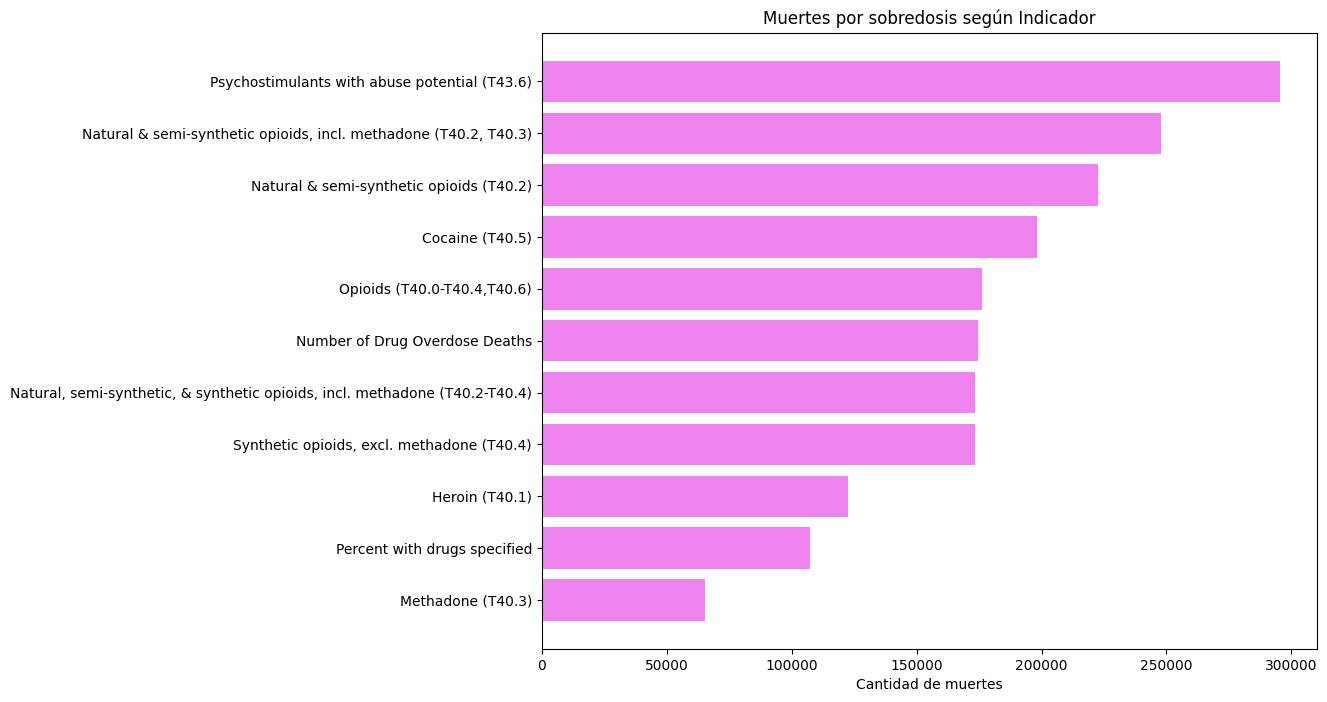

In [11]:
indicadores = drug_deaths.index
valores= drug_deaths.values


plt.figure(figsize=(10, 8))

plt.barh(indicadores, valores, color= "violet")
plt.xlabel("Cantidad de muertes")
plt.title("Muertes por sobredosis según Indicador")
plt.gca().invert_yaxis()#invierte los ejes y los ordena 


plt.show()

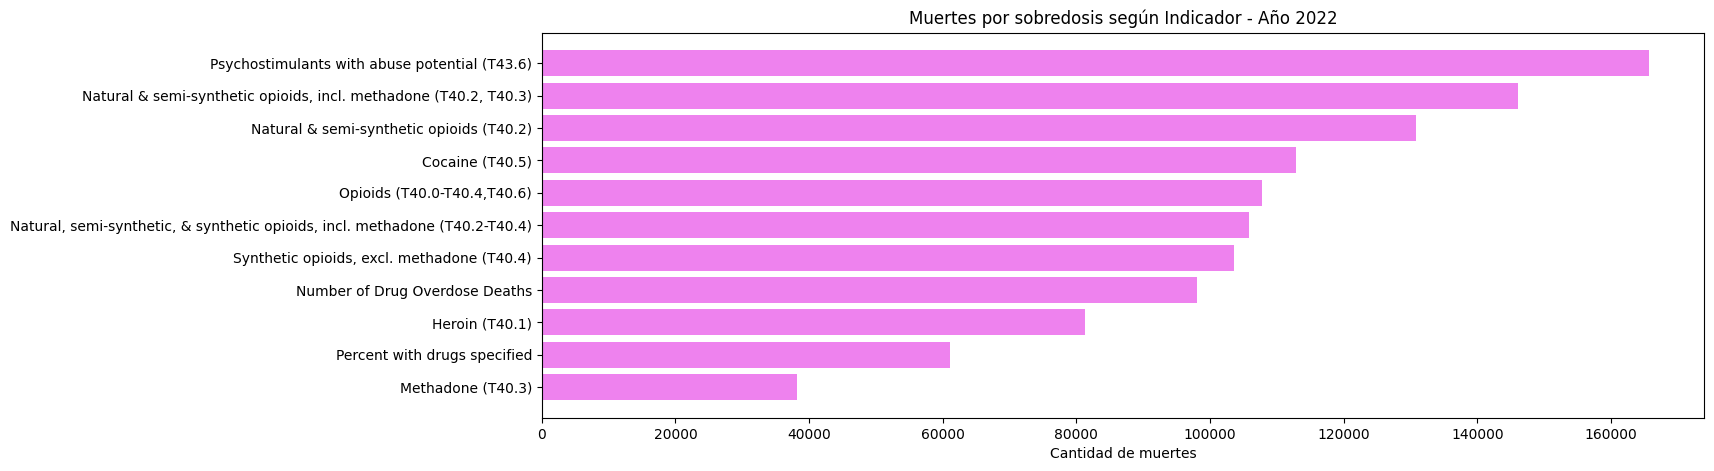

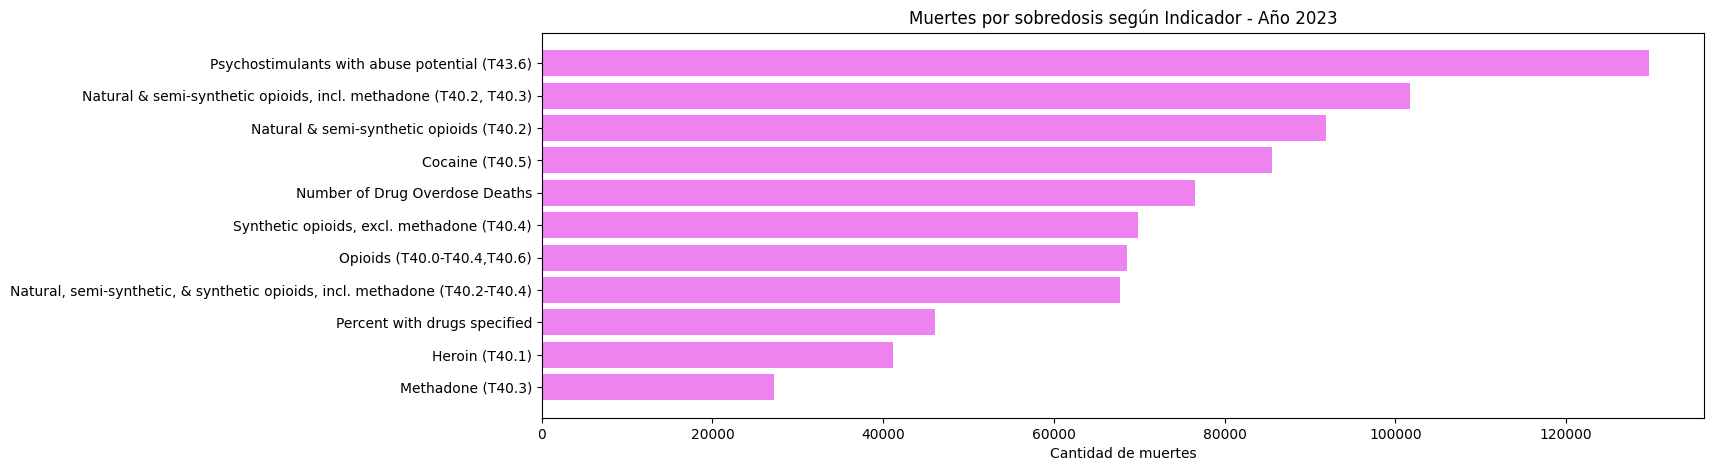

In [21]:
# Agrupar los datos por año y por indicador, y sumar los valores de cada indicador
drug_deaths_yearly = Overdose_filtered.groupby(['Year', 'Indicator'])['Data Value'].sum().reset_index()

# Recorrer cada año y graficar los indicadores correspondientes
for year in drug_deaths_yearly['Year'].unique():
    plt.figure(figsize=(15, 5))
    data_year = drug_deaths_yearly[(drug_deaths_yearly['Year'] == year)].sort_values(by='Data Value', ascending=False)
    indicadores = data_year["Indicator"]
    valores = data_year["Data Value"]
    plt.barh(indicadores, valores, color="violet")
    plt.xlabel("Cantidad de muertes")
    plt.title(f"Muertes por sobredosis según Indicador - Año {year}")
    plt.gca().invert_yaxis()  # Invierte los ejes y los ordena
    plt.show()

#### **Conclusion**

### Creación de columna Date_Month_Year y dataset de Número de muertes por sobredosis solamente

In [23]:
import datetime

Overdose_filtered["Year"] = Overdose_filtered["Year"].astype(str)
Overdose_filtered["Date_Month_Year"] = Overdose_filtered["Month"] + "" + Overdose_filtered["Year"]

Overdose_filtered["Date"]= pd.to_datetime(Overdose_filtered["Date_Month_Year"], format= "%B%Y")

Num_of_drug_Overdose_22= Overdose_filtered[Overdose_filtered.Indicator == "Number of Drug Overdose Deaths"]

Num_of_drug_Overdose_22

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value,Date_Month_Year,Date
1013,AK,2022,April,12 month-ending,Number of Drug Overdose Deaths,257.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,257,April2022,2022-04-01
1023,AK,2022,August,12 month-ending,Number of Drug Overdose Deaths,249.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,249,August2022,2022-08-01
1032,AK,2022,December,12 month-ending,Number of Drug Overdose Deaths,247.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,247,December2022,2022-12-01
1044,AK,2022,February,12 month-ending,Number of Drug Overdose Deaths,257.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,257,February2022,2022-02-01
1057,AK,2022,January,12 month-ending,Number of Drug Overdose Deaths,253.0,100,0.000000,Alaska,Numbers may differ from published reports usin...,**,253,January2022,2022-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63890,YC,2023,July,12 month-ending,Number of Drug Overdose Deaths,NaN,100,0.422008,New York City,Underreported due to incomplete data.,*,"3,368",July2023,2023-07-01
63901,YC,2023,June,12 month-ending,Number of Drug Overdose Deaths,NaN,100,0.312642,New York City,Underreported due to incomplete data.,*,"3,335",June2023,2023-06-01
63910,YC,2023,March,12 month-ending,Number of Drug Overdose Deaths,NaN,100,0.200293,New York City,Underreported due to incomplete data.,*,"3,233",March2023,2023-03-01
63926,YC,2023,May,12 month-ending,Number of Drug Overdose Deaths,NaN,100,0.269743,New York City,Underreported due to incomplete data.,*,"3,285",May2023,2023-05-01


In [24]:
Num_of_drug_Overdose_22.to_csv("datasets/Num_of_drug_Overdose_22.csv", index= False)

### Cantidad de muertes por sobredosis y por estado

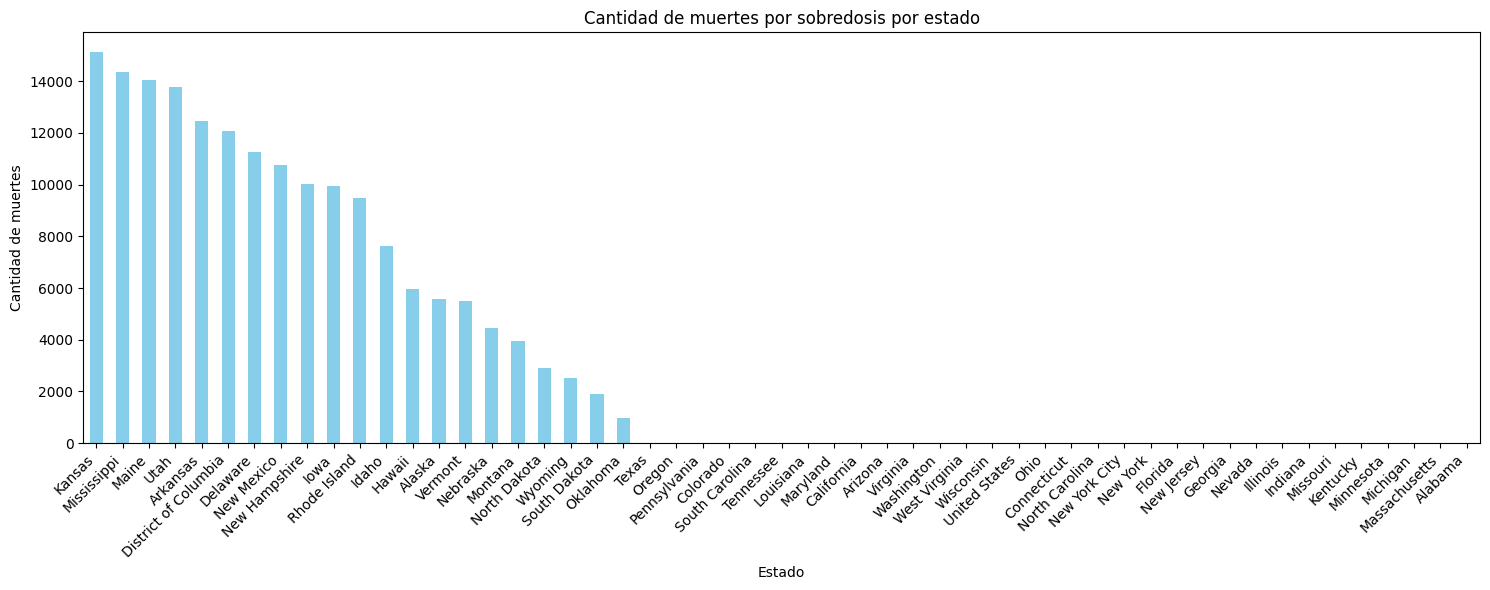

In [25]:
#agrupo datos por estado y sumo
deaths_state= Num_of_drug_Overdose_22.groupby("State Name")["Data Value"].sum().sort_values(ascending=False)

plt.figure(figsize=(15,6))

deaths_state.plot(kind="bar", color= "skyblue")

plt.title("Cantidad de muertes por sobredosis por estado")
plt.xlabel('Estado')
plt.ylabel('Cantidad de muertes')
plt.xticks(rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad

plt.tight_layout()
plt.show()

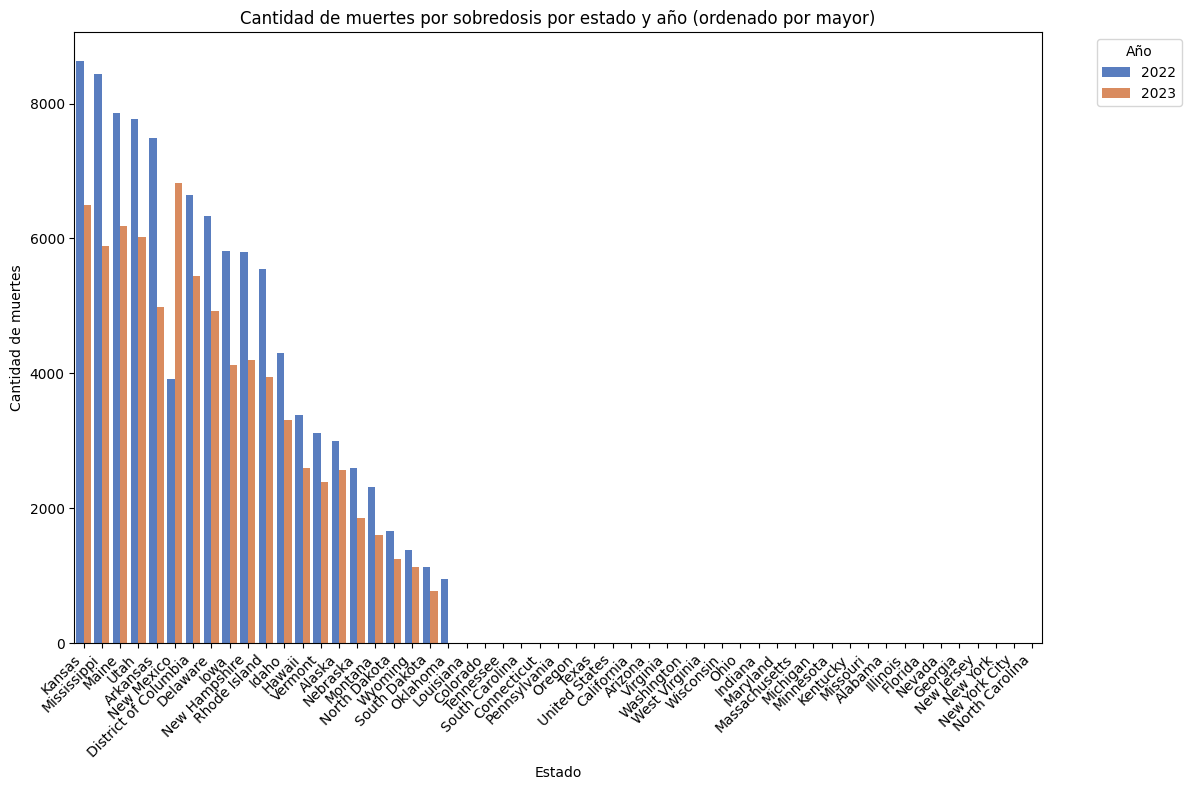

In [26]:
# Agrupar los datos por estado y año y sumar las muertes
muertes_por_estado_y_año = Num_of_drug_Overdose_22.groupby(['State Name', 'Year'])['Data Value'].sum().reset_index()

# Ordenar los datos por la cantidad de muertes de mayor a menor
muertes_por_estado_y_año_sorted = muertes_por_estado_y_año.sort_values(by='Data Value', ascending=False)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los datos
sns.barplot(data=muertes_por_estado_y_año_sorted, x='State Name', y='Data Value', hue='Year', palette='muted', ax=ax)

# Personalizar el gráfico
ax.set_title('Cantidad de muertes por sobredosis por estado y año (ordenado por mayor)')
ax.set_xlabel('Estado')
ax.set_ylabel('Cantidad de muertes')
ax.set_xticklabels(muertes_por_estado_y_año_sorted['State Name'].unique(), rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
ax.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

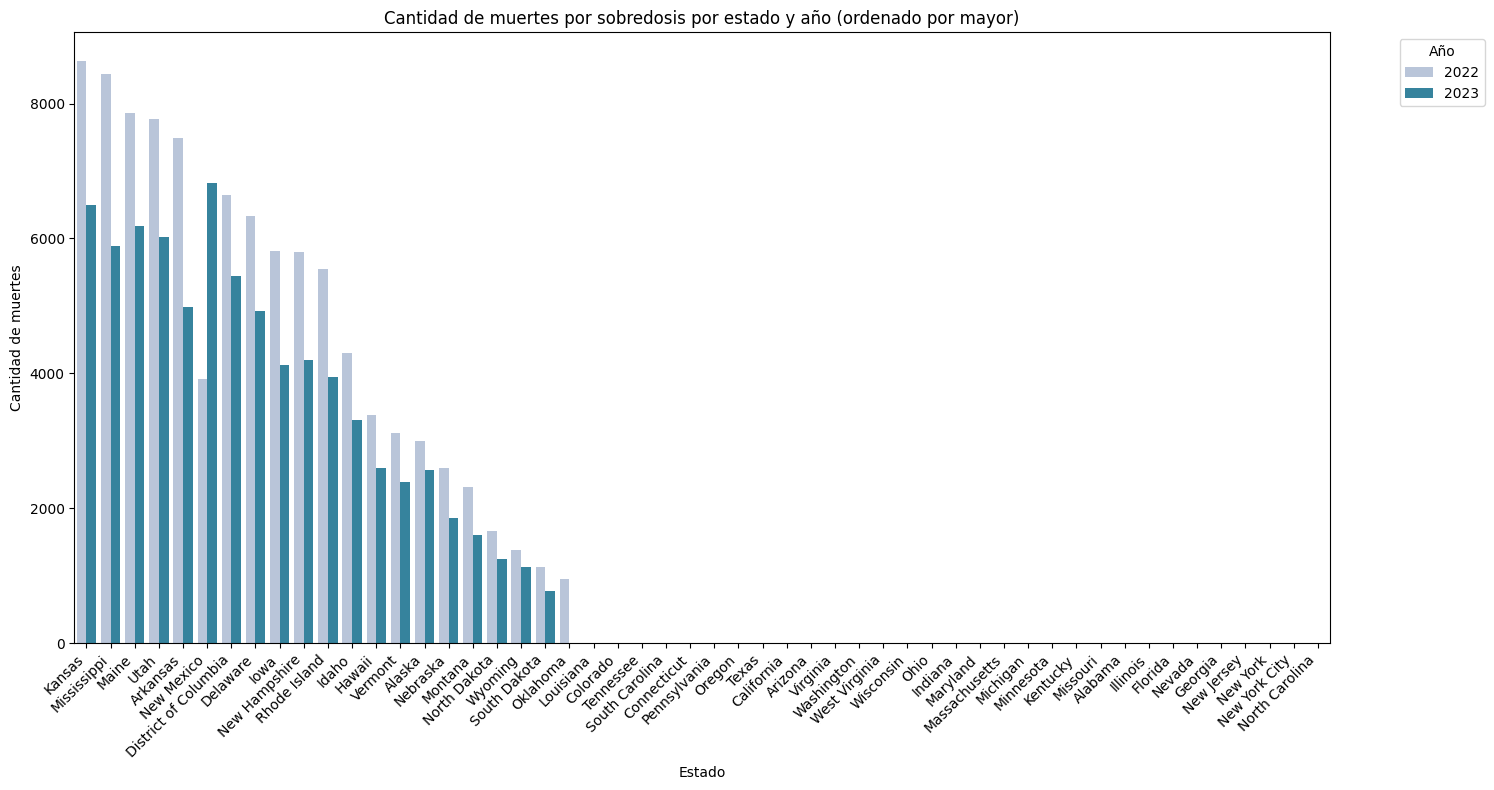

In [27]:
# Filtrar los datos para excluir el estado "United States"
muertes_por_estado_y_año_filtered = muertes_por_estado_y_año_sorted[muertes_por_estado_y_año_sorted['State Name'] != 'United States']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(15, 8))

# Graficar los datos
sns.barplot(data=muertes_por_estado_y_año_filtered, x='State Name', y='Data Value', hue='Year', palette='PuBuGn', ax=ax)

# Personalizar el gráfico
ax.set_title('Cantidad de muertes por sobredosis por estado y año (ordenado por mayor)')
ax.set_xlabel('Estado')
ax.set_ylabel('Cantidad de muertes')
ax.set_xticklabels(muertes_por_estado_y_año_filtered['State Name'].unique(), rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
ax.legend(title='Año', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()

#### **Conclusión**

### Cantidad de muertes por sobredosis relacionadas con el mes del año

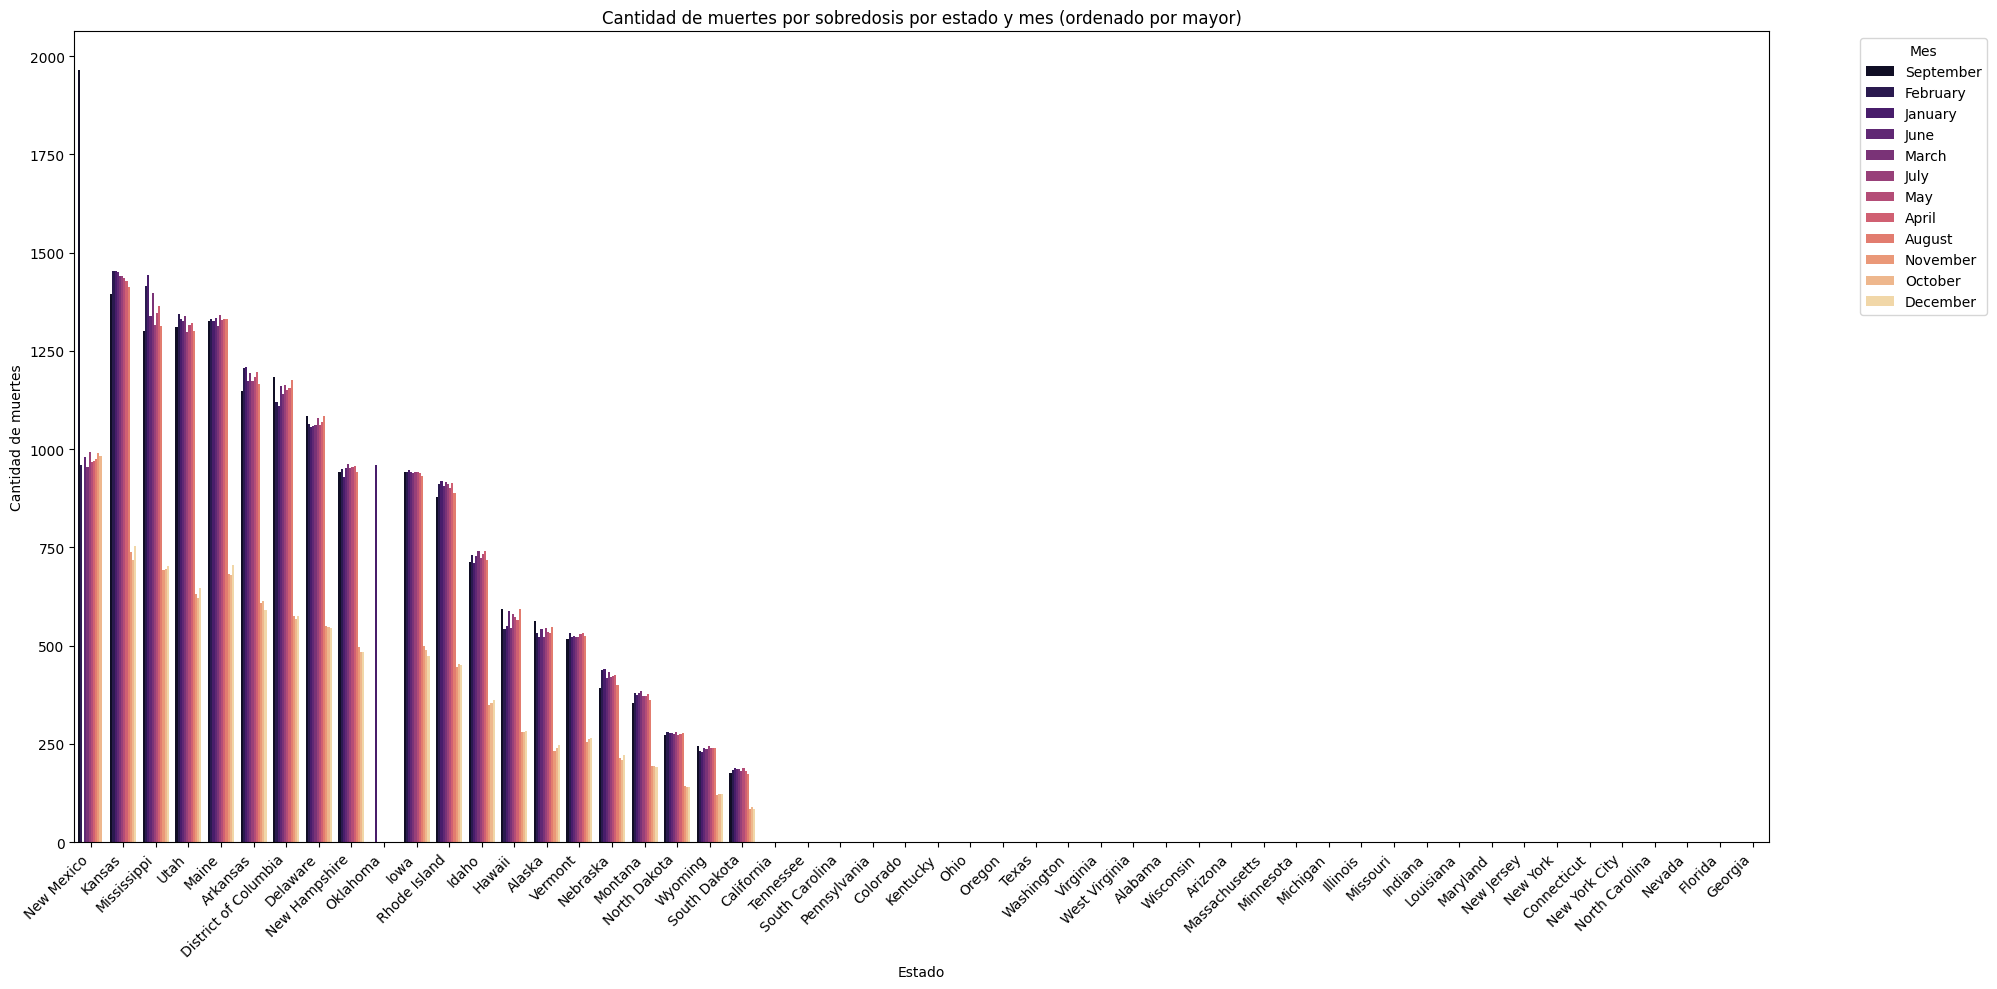

In [28]:
# Agrupar los datos por estado y año y sumar las muertes
muertes_por_estado_y_mes = Num_of_drug_Overdose_22.groupby(['State Name', 'Month'])['Data Value'].sum().reset_index()

# Ordenar los datos por la cantidad de muertes de mayor a menor
muertes_por_estado_y_año_sorted = muertes_por_estado_y_mes.sort_values(by='Data Value', ascending=False)


# Filtrar los datos para excluir el estado "United States"
muertes_por_estado_y_año_filtered = muertes_por_estado_y_año_sorted[muertes_por_estado_y_año_sorted['State Name'] != 'United States']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(20,10))

# Graficar los datos
sns.barplot(data=muertes_por_estado_y_año_filtered, x='State Name', y='Data Value', hue='Month', palette='magma', ax=ax)

# Personalizar el gráfico
ax.set_title('Cantidad de muertes por sobredosis por estado y mes (ordenado por mayor)')
ax.set_xlabel('Estado')
ax.set_ylabel('Cantidad de muertes')
ax.set_xticklabels(muertes_por_estado_y_año_filtered['State Name'].unique(), rotation=45, ha='right')  # Rotar las etiquetas del eje x para mayor legibilidad
ax.legend(title='Mes', bbox_to_anchor=(1.05, 1), loc='upper left')

# Mostrar el gráfico
plt.tight_layout()
plt.show()